# **TODO**
* Features cross products
* Square and cube roots
* phi features overfit?

# Import libraries

In [1]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

from lib.proj1_helpers import * #the helper provided for the project

from implementations import * #our implementations of the functions done by us
from helpers import *
import datetime
import operator
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Loading the training and the testing sets

In [3]:
DATA_FOLDER = 'data/'

y_train, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)

In [4]:
y_train

array([ 1., -1., -1., ...,  1., -1., -1.])

In [5]:
tx_train

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ..., 
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [6]:
tx_test

array([[-999.   ,   79.589,   23.916, ..., -999.   , -999.   ,    0.   ],
       [ 106.398,   67.49 ,   87.949, ..., -999.   , -999.   ,   47.575],
       [ 117.794,   56.226,   96.358, ..., -999.   , -999.   ,    0.   ],
       ..., 
       [ 108.497,    9.837,   65.149, ..., -999.   , -999.   ,    0.   ],
       [  96.711,   20.006,   66.942, ..., -999.   , -999.   ,   30.863],
       [  92.373,   80.109,   77.619, ..., -999.   , -999.   ,    0.   ]])

In [7]:
y_test

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

# Handling missing values (-999)

In [8]:
def clean_missing_values(tx):
    nan_values = (tx==-999)*1
    for col in range(tx.shape[1]):
        column = tx[:,col][tx[:,col]!=-999]
        median = np.median(column)
        tx[:,col][tx[:,col]==-999] = median
    return tx, nan_values

In [9]:
tx_train, nan_values_train = clean_missing_values(tx_train)
tx_test, nan_values_test = clean_missing_values(tx_test)

In [10]:
def add_nan_feature(tx, nan_values):
    # Keep in nan_values only the columns containing ones (i.e. keep only columns that used to contain -999)
    cols_wo_nan_ids = [i for i in range(nan_values.shape[1]) if np.prod((nan_values.T[i]==0)*1)==1]
    nan_values = np.delete(nan_values, cols_wo_nan_ids, axis=1)

    # If two (or more) columns of nan_values are equal, keep only one of them
    unique_nan_cols_ids = [0]
    #erase_cols_ids = []
    for i in range(1,nan_values.shape[1]):
        id_loop = unique_nan_cols_ids
        erase = False
        for j in id_loop:
            if np.sum(nan_values.T[i]-nan_values.T[j])==0:
                #erase_cols_ids.append(i)
                erase = True
                break
        if erase == False:
            unique_nan_cols_ids.append(i)
    nan_values = nan_values[:,unique_nan_cols_ids]
    
    # Concatenate nan_values with the original data matrix tx
    return np.concatenate((tx, nan_values), axis=1)

In [11]:
print(tx_train.shape)
tx_train = add_nan_feature(tx_train, nan_values_train)
print(tx_train.shape)
del nan_values_train

(250000, 30)
(250000, 33)


In [12]:
print(tx_test.shape)
tx_test = add_nan_feature(tx_test, nan_values_test)
print(tx_test.shape)
del nan_values_test

(568238, 30)
(568238, 33)


# Manage categorical data (feature 22)

In [13]:
tx_train[:,22]

array([ 2.,  1.,  1., ...,  1.,  0.,  0.])

In [14]:
def manage_categorical_data(tx):
    idx_cat = 22
    larger_tx = np.zeros([tx.shape[0],3])
    # larger_tx[:,0] = (tx[:,idx_cat]==0)*1 ---> not done, because it is equivalent to a dummy variable due to -999
    larger_tx[:,0] = (tx[:,idx_cat]==1)*1
    larger_tx[:,1] = (tx[:,idx_cat]==2)*1
    larger_tx[:,2] = (tx[:,idx_cat]==3)*1
    tx = np.delete(tx, idx_cat, axis=1)
    tx = np.concatenate((tx, larger_tx), axis=1)
    return tx

In [15]:
print(tx_train.shape)
tx_train = manage_categorical_data(tx_train)
print(tx_train.shape)

(250000, 33)
(250000, 35)


In [16]:
print(tx_test.shape)
tx_test = manage_categorical_data(tx_test)
print(tx_test.shape)

(568238, 33)
(568238, 35)


# Standardization of data

In [17]:
tx_train = standardize(tx_train)
tx_train = tx_train[0]
tx_test = standardize(tx_test)
tx_test = tx_test[0]

# Add cross-products

In [18]:
def add_cross_prod(tx, i, j):
    return np.concatenate((tx, np.array([tx[:,i]*tx[:,j]]).T), axis=1)

In [19]:
def add_all_cross_prod(tx):
    sh = tx.shape[1]
    for i in range(sh):
        print(i)
        for j in range(i+1, sh):
            if i != j:
                tx = add_cross_prod(tx, i, j)
    return tx

In [20]:
tx_train = add_all_cross_prod(tx_train)
tx_test = add_all_cross_prod(tx_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [21]:
print(tx_train.shape)
print(tx_test.shape)

(250000, 630)
(568238, 630)


# Add a column of all ones

In [22]:
def add_ones(tx):
    return np.concatenate((tx, np.ones([tx.shape[0],1])), axis=1)

In [23]:
tx_train = add_ones(tx_train)
tx_test = add_ones(tx_test)

# Not to have to compute it each time:

In [ ]:
# np.savetxt("data/tx_train_uptoones.csv", tx_train, delimiter=",")
# np.savetxt("data/tx_test_uptoones.csv", tx_test, delimiter=",")

# !!!!!!!!!!!!! one can begin directly here, after loading y_train and y_test

In [ ]:
#from numpy import genfromtxt

In [ ]:
#tx_train = genfromtxt('data/tx_train_uptoones.csv', delimiter=',')
#tx_test = genfromtxt('data/tx_test_uptoones.csv', delimiter=',')

# Add powers of the columns

In [24]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=1 up to j=degree."""
    return np.array([x**p for p in range(2,degree+1)]).T 
    # not range from 0 because we have already added a column of ones, 
    # not range from 1 because we already have the linear features.

In [25]:
def add_powers(tx, degree):
    for col in range(29): #range(tx.shape[1]):
        tx = np.concatenate((tx, build_poly(tx[:,col], degree)), axis=1)
    return tx

In [26]:
# DONE IN CROSS VALIDATION
# deg = 11
# tx_train = add_powers(tx_train, deg)
# tx_test = add_powers(tx_test, deg)

In [27]:
print(tx_train.shape)
print(tx_test.shape)

(250000, 631)
(568238, 631)


# Cross-validation

In [28]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

# Submission trials

## Least squares

## Gradient descent

## Stochastic gradient descent

## Ridge regression

In [29]:
def cross_validation_ridge_regression(y, tx, k_indices, k, lambda_, degree, fct='rmse'):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    k_index = k_indices[k]
    test_y = y[k_index]
    test_tx = tx[k_index,:]

    mask = np.ones(len(y), dtype=bool) # set all elements to True
    mask[k_index] = False              # set test elements to False
    train_tx = tx[mask,:]              # select only True elements (ie train elements)
    train_y = y[mask]
    
    # ridge regression and
    # calculate the loss for train and test data
    weights = ridge_regression(train_y, train_tx, lambda_)

    y_pred_train = predict_labels(weights, train_tx)
    y_pred_test = predict_labels(weights, test_tx)
    right_train = np.sum(y_pred_train == train_y)/len(train_y)*100
    right_test = np.sum(y_pred_test == test_y)/len(test_y)*100
    
    return right_train, right_test

In [30]:
seed = 1
k_fold = 4
k_indices = build_k_indices(y_train, k_fold, seed)

lambdas = np.logspace(-15,-3,10)
degrees = range(5,16)

right_train_l = np.zeros([len(lambdas), len(degrees)])
right_test_l = np.zeros([len(lambdas), len(degrees)])

for j,degree in enumerate(degrees):
    print('j = ', j+1, ' over ', len(degrees), ' ; Degree = ', degree)
    tx_train_pow = add_powers(tx_train, degree)
    for i,lambda_ in enumerate(lambdas):
        print('i = ', i+1, ' over ', len(lambdas), ' ; Lambda_ = ', lambda_)
        right_train = 0
        right_test = 0
        for k in range(k_fold):
            right_train_temp, right_test_temp = cross_validation_ridge_regression(y_train, tx_train_pow, k_indices, k, lambda_, degree)
            right_train += right_train_temp
            right_test += right_test_temp
        right_train_l[i,j] = right_train/k_fold
        right_test_l[i,j] = right_test/k_fold
    del tx_train_pow, right_train, right_test, right_train_temp, right_test_temp


j =  1  over  11  ; Degree =  5
i =  1  over  10  ; Lambda_ =  1e-15
i =  2  over  10  ; Lambda_ =  2.15443469003e-14
i =  3  over  10  ; Lambda_ =  4.64158883361e-13
i =  4  over  10  ; Lambda_ =  1e-11
i =  5  over  10  ; Lambda_ =  2.15443469003e-10
i =  6  over  10  ; Lambda_ =  4.64158883361e-09
i =  7  over  10  ; Lambda_ =  1e-07
i =  8  over  10  ; Lambda_ =  2.15443469003e-06
i =  9  over  10  ; Lambda_ =  4.64158883361e-05
i =  10  over  10  ; Lambda_ =  0.001
j =  2  over  11  ; Degree =  6
i =  1  over  10  ; Lambda_ =  1e-15
i =  2  over  10  ; Lambda_ =  2.15443469003e-14
i =  3  over  10  ; Lambda_ =  4.64158883361e-13
i =  4  over  10  ; Lambda_ =  1e-11
i =  5  over  10  ; Lambda_ =  2.15443469003e-10
i =  6  over  10  ; Lambda_ =  4.64158883361e-09
i =  7  over  10  ; Lambda_ =  1e-07
i =  8  over  10  ; Lambda_ =  2.15443469003e-06
i =  9  over  10  ; Lambda_ =  4.64158883361e-05
i =  10  over  10  ; Lambda_ =  0.001
j =  3  over  11  ; Degree =  7
i =  1  over  10  

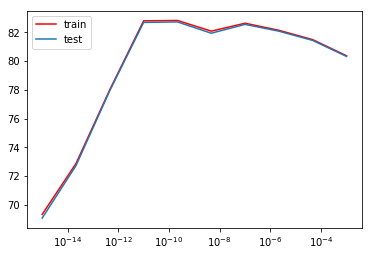

In [31]:
plt.semilogx(lambdas, right_train_l[:,7], label='train', color='r')
plt.semilogx(lambdas, right_test_l[:,7], label='test')
plt.legend()

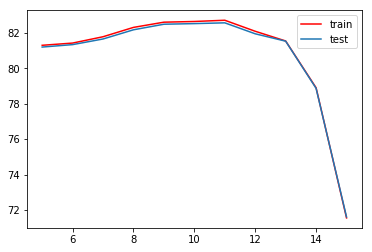

In [32]:
plt.plot(degrees, right_train_l[5,:], label='train', color='r')
plt.plot(degrees, right_test_l[5,:], label='test')
plt.legend()

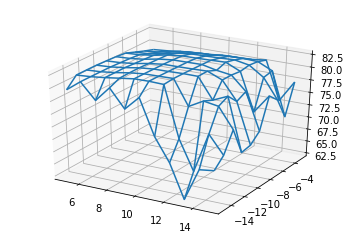

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.array(degrees), lambdas)
surf = ax.plot_wireframe(X, np.log10(Y), right_test_l) #, rstride=1, cstride=1, cmap=cm.coolwarm,
        #linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

And now, let us compute the results on the validation set.

In [68]:
max_id_i, max_id_j = np.unravel_index(right_test_l.argmax(), right_test_l.shape)
print(right_test_l[max_id_i, max_id_j])
print(right_train_l[max_id_i, max_id_j])
lambda_ = 1e-10 #lambdas[max_id_i] #5e-12
deg = degrees[max_id_j]
print('Lambda =', lambda_, '; degree =', deg)

82.7532
82.8958666667
Lambda = 5e-12 ; degree = 11


In [69]:
tx_train = add_powers(tx_train, deg)

In [52]:
tx_test = add_powers(tx_test, deg)

In [70]:
weights = ridge_regression(y_train, tx_train, lambda_);

LinAlgError: Singular matrix

In [ ]:
print('losses: \n','\n\n','weights: \n',weights)

In [63]:
np.dot(tx_test, weights)[1:200]

array([-0.68629069, -0.00788039,  0.49689688, -1.45060066, -1.08475153,
       -0.5831492 , -0.47528623, -1.06190256,  0.59034914, -0.89316669,
       -0.59273087, -0.21964747, -1.04471554, -1.27681363, -0.90282099,
       -0.56541815, -1.60926925, -0.97722038,  0.33421835, -0.63040597,
       -1.09299159, -1.15036195, -0.81190392, -0.69901124,  0.09576959,
        0.34538792, -0.57178352, -0.89307104, -0.5510974 , -0.7780682 ,
       -0.08840282,  0.10103959,  0.18717075, -0.85732481, -0.53290182,
       -1.12870351, -0.70769648,  0.11002433, -0.86505681, -0.67576509,
       -0.78869387, -1.20086697, -0.56225091, -0.03407968, -0.10045928,
       -0.85738884,  0.58106359,  0.03922261, -0.7795826 ,  0.17815763,
        0.54493208,  0.40501151,  0.46208043,  1.11383354, -1.39876087,
       -0.57452925, -0.92381176,  0.42901733, -0.30685633, -0.74523497,
       -0.16967842,  0.51325894, -0.84951029,  0.63603887, -0.22414796,
       -0.74678793, -0.83833703,  0.48683368,  0.86469888,  0.67

In [64]:
y_pred = predict_labels(weights, tx_test)

In [65]:
y_pred[y_pred==-1].shape

(373938,)

In [66]:
y_pred[y_pred==1].shape

(194300,)

In [67]:
name = 'output/ridge_regression_ondine_4.csv'
create_csv_submission(ids_test, y_pred, name)

## Logistic regression

## Regularized logistic regression

## Newton regularized logistic regression